# Fundamental models and tools

There are several ways to code color. The method accessible with the ***matplotlib.image*** library is the RGB method. Each color is represented by a list with three entries $[r, g, b]$ where $r$, $g$ and $b$ are three reals respectively representing the quantity of red, green and blue contained in the color.

The method of mixing colors is additive synthesis. The mixture of the three colored lights creates the desired color. If $r = g = b = 0$, i.e. no color, the pixel is black. If $r$, $g$ and $b$ have their maximum value, the pixel is white. This maximum value depends on the image and the aspect ratio: it can be 1 or 255.



Load and display Image with numpy
import ***matplotlib.image*** library.

Retrieve the image 'baboon.png' from https://homepages.cae.wisc.edu/~ece533/images/baboon.png, and save it in the working directory. 
Using instructions of the ***matplotlib.image*** library, load the image 'baboon.png' so that the image is managed as a numpy array.



(512, 512, 3)
0.0 1.0


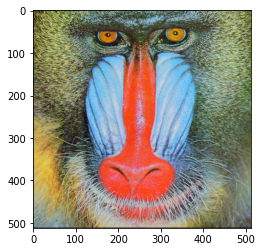

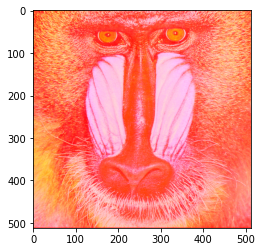

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
img = mpimg.imread('https://homepages.cae.wisc.edu/~ece533/images/baboon.png')
mpimg.imsave('baboon.png', img)
#img = mpimg.imread('baboon.png')
#print(img)
print(img.shape) 
print(img.min(), img.max())
# -----------------------------
plt.imshow(img) 
plt.show()
# -----------------------------
img_red = img
img_red[:, :, 0] = 1
plt.imshow(img_red)
plt.show()

##Negative Image
A negative image is an image whose colors have been inverted compared to the original; for example, red becomes cyan, green becomes magenta, blue becomes yellow. The dark regions become clear, the black becomes white. For this, it is enough to invert the levels of each of the primary colors.


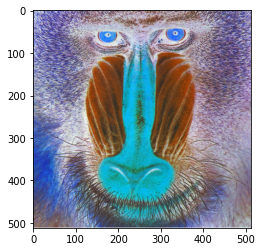

In [ ]:
import numpy as np
def Negative(image_file):
    img = mpimg.imread(image_file)
    inversed_img = 1 - img[:,:,:3]
    plt.imshow(inversed_img)
    mpimg.imsave("negative_" + image_file, inversed_img)
    return(inversed_img)
img_file = 'baboon.png'
negative_img = Negative(img_file)
plt.imshow(negative_img)

## Decomposition of an image into “RGB”

As explained at the beginning, we use here the additive synthesis of colors.
Call the function **Color_Separation()** that returns three images each one corresponds to red, green and blue component respectively.

Plot the result.

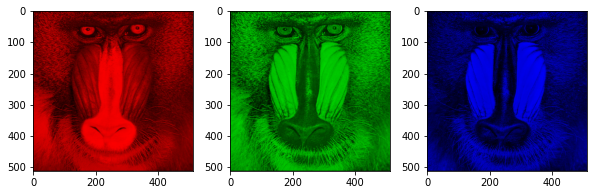

In [ ]:
import numpy as np
def Color_Separation(image_file):
    
    img = mpimg.imread(image_file)
    
    W,H,_=img.shape
    red_img = np.zeros((W,H,3))
    green_img = np.zeros((W,H,3))
    blue_img = np.zeros((W,H,3))
    red_img[:,:,0] = img[:,:,0]
    green_img[:,:,1] = img[:,:,1]
    blue_img[:,:,2] = img[:,:,2]
    
    mpimg.imsave("red_" + image_file, red_img)
    mpimg.imsave("green_" + image_file, green_img)
    mpimg.imsave("blue_" + image_file, blue_img)
    return(red_img, green_img, blue_img)

(r, g, b) = Color_Separation("baboon.png")

#Plotting the three images
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(3,3,1)
ax1.imshow(r)
ax2 = fig.add_subplot(3,3,2)
ax2.imshow(g)
ax3 = fig.add_subplot(3,3,3)
ax3.imshow(b)

## From Color image to Grayscale image

In a grayscale image, the three **R**, **G**, **B** components of each pixel have the same value. Call a function ***Mean_Gray()*** that replace the three levels **R**, **G**, **B** by their mean and return a new image, in grayscale.



Now, call a function ***MeanMinMax_Gray()*** that take the mean between the minimum and the maximum of the three components and return a new image in grayscale.


(512, 512, 4) (512, 512)


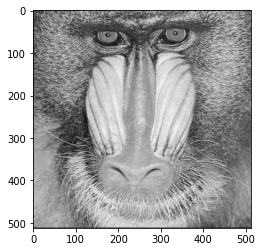

In [ ]:

def Mean_Gray(image_file):
    img = mpimg.imread(image_file)
    gray_img = (img[ : , : , 0] + img[ : , : , 1] + img[ : , : , 2])/3
    mpimg.imsave("Meangray_"+image_file, gray_img, cmap="gray")
    print(img.shape, gray_img.shape)
    return(gray_img)


def Bright_Gray(image_file):
    img = mpimg.imread(image_file)
    gray = ((0.2125 * img[ : , : , 0]) + (0.7154 * img[ : , : , 1]) + (0.0721 * img[ : , : , 2]))
    return(gray)


def Minmax_Gray(image_file):
    img = mpimg.imread(image_file)
    height, width, color = img.shape
    imggray  = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            imggray[i,j] = (max( img[i,j,0], img[i,j,1], img[i,j,2]) + min( img[i,j,0], img[i,j,1], img[i,j,2]))/2
    mpimg.imsave("Minmaxgray_" + image_file, imggray , cmap="gray")
    return(imggray)

img_file = 'baboon.png'

plt.imshow(Mean_Gray("baboon.png"), cmap='gray')
plt.imshow(Bright_Gray("baboon.png"),cmap='gray')
plt.imshow(Minmax_Gray("baboon.png"),cmap='gray')

## From Color image to Black and white image : Thresholding
Call the function BW() that transform the image into black and white. 

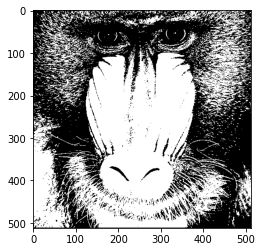

In [ ]:
def BW(image_file, threshold, method):
    img = mpimg.imread(image_file)
    #(height, width, depth) = img.shape
    imggray = method(image_file)
    imgBW = (imggray >= threshold)
    mpimg.imsave("BW_" + image_file, imgBW, cmap="gray")
    return(imgBW)
plt.imshow(BW("baboon.png", 0.5, Minmax_Gray ), cmap="gray")